In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Comments on data:
-- weight
1. Min value in weight is zero, which means some labels are not recorded properly
2. outliers : 

In [38]:
q3, q1 = np.percentile(data.Weight, [75 ,25])
iqr = q3-q1

def is_outlier_iqr(iqr,q3,q1,data,key):
    max_iqr = (1.5*iqr) + q3
    min_iqr = (1.5*iqr) - q1 
    print(min_iqr)
    count_max_iqr_el = data[key].loc[data[key] > max_iqr ].count()
    count_min_iqr_el = data[key].loc[data[key] < min_iqr ].count()
    return {'max_outliers' : count_max_iqr_el, 'min_outliers' : count_min_iqr_el}

outlier_data_for_weight = is_outlier_iqr(iqr,q3,q1,data,'Weight')
outlier_data_for_weight

675.0


{'max_outliers': 3, 'min_outliers': 120}

<h4>Analysing and Dealing with Outliers</h4>

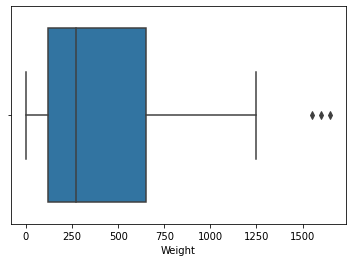

In [28]:
sns.boxplot(x=data['Weight']);

Remove outliers

In [40]:
dfw = data['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [41]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

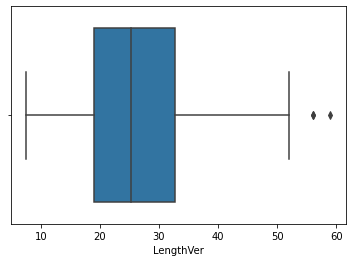

In [45]:
sns.boxplot(x=data['LengthVer']);

In [43]:
dflv = data['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

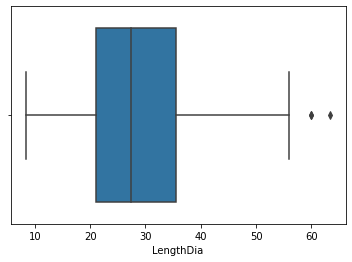

In [47]:
sns.boxplot(x=data['LengthDia']);

In [48]:
dfdia = data['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

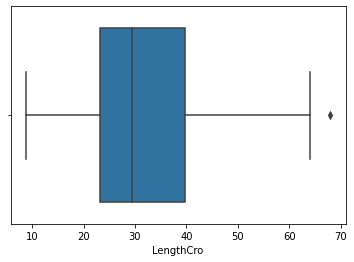

In [50]:
sns.boxplot(x=data['LengthCro']);

In [52]:
dfcro = data['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

Outliers of the Dataset:

In [54]:
data[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [56]:
df1 = data.drop([142,143,144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


<h4>2. PREPARING THE MACHINE LEARNING MODEL:

Separating Dependant and Independant Variables </h4>

In [58]:
# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]

<h4>Dividing Dataset into Train and Test Datasets</h4>

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [60]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [62]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.00887253881797
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [63]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


In [64]:
y_head = reg.predict(X_train)

<h4>Analysing the Success of the Model from Train Dataset and Predictions:</h4>

In [66]:
r2_score(y_train, y_head)

0.9116039087262157

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


There are 10 different versions of r2 scores using my model (reg). If I get the average of this I can achieve cross validated r2 score of my training model:

In [68]:
cross_val_score_train.mean()

0.8835411966576625

Using Trained Model and Test Dataset to Estimate Weights:

In [69]:
y_pred = reg.predict(X_test)

Analysing the Success of the Trained Model from Test Dataset and Predictions:

In [70]:
print(r2_score(y_test, y_pred))

0.8671964388742469


4. VISUALISATION OF THE PREDICTIONS:

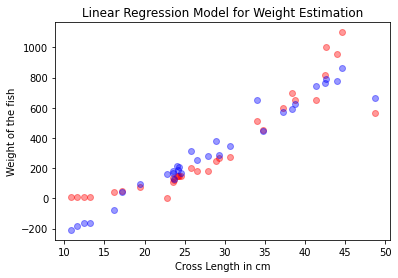

In [72]:
plt.scatter(X_test['LengthCro'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['LengthCro'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

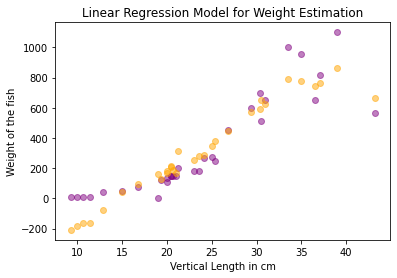

In [73]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

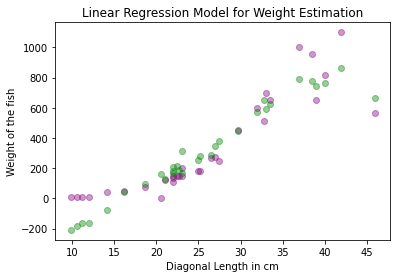

In [74]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

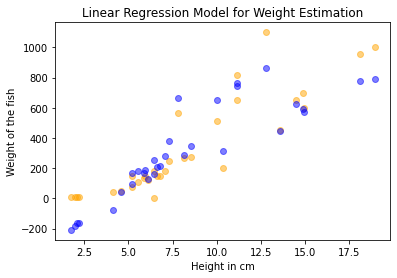

In [75]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

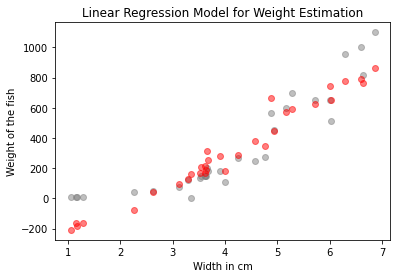

In [76]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

5. COMPARING REAL AND PREDICTED WEIGHTS

In [78]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [79]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [80]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


From the results above, one can see there is a tendency towards errorous estimations when the weight is small.